# STINTSY Machine Project - Group 5 (S18)
**Members:**

Argamosa, Daniel Cedric

Cabinbin, Pierre Genric

Kua, Miguel Carlo

Sang, Nathan Immanuel



## 1. Introduction to the Problem and Dataset
In this Notebook, we will be exploring and analyzing a dataset about [Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption/data) from the website Kaggle, which provides insights into the social, demographic, and academic characteristics of secondary school students. The dataset was obtained from a survey conducted on students from Portuguese secondary schools who were enrolled in Math and Portuguese language courses, offering a rich foundation for exploring the factors that influence academic performance.

The primary goal is to examine how various factors, including family background, lifestyle, and alcohol consumption, relate to the culmination of their academic performance, their final grades, becoming a regression-focused study. Afterwards, another test would be finding out how big does alcohol consumption rank between all those factors. So by applying regression analysis, we aim to uncover the extent to which factors like alcohol consumption, family relationships, and study habits predict students' final grades, allowing us to quantify their impact.

For more context, in Portugal, alcohol consumption is an accepted part of the culture, and drinking is often integrated into social events from a young age. Unlike in some other countries where alcohol consumption is more strictly regulated for minors, Portugal has a tradition of moderate drinking, which is often seen in social gatherings and family events. Furthermore, Portugal’s educational system places a strong emphasis on both academic and social development, with a focus on well-rounded education.

This dataset provides a unique opportunity to study these complex interactions, as it includes not only demographic and academic data but also lifestyle and health information. In other words, the nature of this dataset which encompasses factors from family relationships, study habits to alcohol consumption, allows for a deep dive into how different factors impact academic performance that could be used for educational practices in addressing the relationship between lifestyle choices and academic success.

## 2. Description of the Dataset

The dataset consists of data collected from secondary school students in Portugal having a variety of demographic, academic, lifestyle, and health-related information. Specifically, the dataset surveys students enrolled in Math and Portuguese language courses, providing insights into factors that may influence their academic performance. Key attributes include family background, social habits, lifestyle choices, and alcohol consumption. The purpose of this dataset is to examine how these factors correlate with students' final grades in their courses, offering a comprehensive look at the influences on academic success.

For more context, in Portugal, alcohol consumption is an accepted part of the culture, and drinking is often integrated into social events from a young age. Unlike in some other countries where alcohol consumption is more strictly regulated for minors, Portugal has a tradition of moderate drinking, which is often seen in social gatherings and family events. Furthermore, Portugal’s educational system places a strong emphasis on both academic and social development, with a focus on well-rounded education.This dataset provides a unique opportunity to study these complex interactions, as it includes not only demographic and academic data but also lifestyle and health information. In other words, the nature of this dataset which encompasses factors from family relationships, study habits to alcohol consumption, allows for a deep dive into how different factors impact academic performance that could be used for educational practices in addressing the relationship between lifestyle choices and academic success.

The dataset was created by combining two separate datasets: one for students enrolled in Math and another for students enrolled in Portuguese. After concatenating both, the new dataset has **1044** instances, from 395 Math instances and 649 Portuguese instances. For the structure of the dataset itself, each row represents a single student’s information, while each column represents a feature about the student, such as their demographic details, family background, alcohol consumption habits, academic performance, and more totaling to **33** unique features.

Here’s a breakdown of all the columns:

1. **Personal and Demographic Details:**
   - `school` - The school attended by the student (e.g., "GP" for Gabriel Pereira, "MS" for Mousinho da Silveira).
   - `sex` - Gender of the student ("F" for female, "M" for male).
   - `age` - Age of the student in years.
   - `address` - Type of student’s home location ("U" for urban, "R" for rural).
   - `famsize` - Family size indicator ("LE3" for families with three or fewer members, "GT3" for families with more than three).

2. **Family Background:**
   - `Pstatus` - Parent's cohabitation status ("T" for living together, "A" for apart).
   - `Medu` - Mother's education level (numeric: 0-4).
   - `Fedu` - Father's education level (numeric: 0-4).
   - `Mjob` - Mother's job (nominal: "teacher", "health", "services", "at_home", "other").
   - `Fjob` - Father's job (nominal: "teacher", "health", "services", "at_home", "other").
   - `reason` - Reason for choosing the school (nominal: "home", "reputation", "course", "other").
   - `guardian` - Parent/guardian education level (nominal: "mother", "father", "other").

3. **Lifestyle and Personal Preferences:**
   - `traveltime` - Time taken to travel to school (numeric: 1-4).
   - `studytime` - Weekly study time (numeric: 1-4).
   - `failures` - Number of past class failures (numeric: 0-4).
   - `schoolsup` - Extra educational support (binary: "yes" or "no").
   - `famsup` - Family educational support (binary: "yes" or "no").
   - `paid` - Extra paid classes within the course subject (binary: "yes" or "no").
   - `activities` - Participation in extracurricular activities (binary: "yes" or "no").
   - `nursery` - Attended nursery school (binary: "yes" or "no").
   - `higher` - Intention to pursue higher education (binary: "yes" or "no").
   - `internet` - Internet access at home (binary: "yes" or "no").
   - `romantic` - With a romantic relationship (binary: "yes" or "no").

4. **Social and Family Relations:**
   - `famrel` - Quality of family relationships (numeric: 1-5).
   - `freetime` - Amount of free time after school (numeric: 1-5).
   - `goout` - Frequency of going out with friends (numeric: 1-5).

5. **Health and Substance Use:**
   - `Dalc` - Workday alcohol consumption (numeric: 1-5).
   - `Walc` - Weekend alcohol consumption (numeric: 1-5).
   - `health` - Current health status (numeric: 1-5).

6. **Academic Performance:**
   - `absences` - Number of school absences (numeric: 0-93).
   - `G1` - First period grade (numeric: 0-20).
   - `G2` - Second period grade (numeric: 0-20).
   - `G3` - Final grade (numeric: 0-20, output target).

## 3. List of Libraries Required

For this project, the following Python libraries have been utilized:

- `pandas`: For efficient data handling and manipulation, allowing for easy loading, processing, and analysis of the dataset.
- `numpy`: For numerical computations and handling array-type data structures, essential for mathematical operations on data.
- `seaborn`: For data visualization, providing a high-level interface for drawing attractive and informative statistical graphics.
- `matplotlib.pyplot`: For creating static, animated, and interactive visualizations, used for visual exploration of data patterns.
- `scikit-learn`: For implementing and evaluating various machine learning models, such as regression models, classification, and clustering, essential for predictive analysis.


## 4. Data Cleaning

This process will add a feature named ``subject`` to both datasets, 0 for Math, 1 for Portuguese before concatenating them, making it ready to be subjected to more data cleaning techniques

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
student_mat = pd.read_csv('student-mat.csv')
student_por = pd.read_csv('student-por.csv')

student_mat['subject'] = 0  # 0 for Math
student_por['subject'] = 1  # 1 for Portuguese

df_student = pd.concat([student_mat, student_por], ignore_index=True)


print(f"Shape of Combined Dataset (After Removing Duplicates, excluding 'subject'): {df_student.shape}")

Shape of Combined Dataset (After Removing Duplicates, excluding 'subject'): (1044, 34)


Because there is a chance that some students may have been enrolled in both Math and Portuguese classes, we will drop duplicate rows according to features based on their personal details and family background

In [2]:

print(f"Shape After Before Duplicates: {df_student.shape}")

merge_columns = [
    "school", "sex", "age", "address", "famsize", "Pstatus",
    "Medu", "Fedu", "Mjob", "Fjob"
]

df_student.drop_duplicates(subset=merge_columns, inplace=True)

print(f"Shape After Dropping Duplicates: {df_student.shape}")

Shape After Before Duplicates: (1044, 34)
Shape After Dropping Duplicates: (613, 34)


Next we would, standardize all entries by removing whitespaces and making all string texts to lowercase for consistency

In [3]:
for col in df_student.select_dtypes(include=['object']).columns:
    df_student[col] = df_student[col].str.strip().str.lower()

print("Features (Before):")
print(df_student.columns.tolist(), "\n")

Features (Before):
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'subject'] 



Then we would label encode all forms of binary data for easier representation

In [4]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'nursery', 'internet', 
               'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'romantic']

label_encoder = LabelEncoder()

for col in binary_cols:
    if col in df_student.columns:
        df_student[col] = label_encoder.fit_transform(df_student[col])

Similarly, we would perform One Hot Encoding to all nominal data, making them become new features with binary values

In [5]:
multi_class_cols = ['Mjob', 'Fjob', 'reason']
df_student = pd.get_dummies(df_student, columns=multi_class_cols, drop_first=True)

Then, we would convert boolean values to integer values, and check if they're all numerical values

In [6]:
df_student = df_student.applymap(lambda x: 1 if x is True else (0 if x is False else x))

all_numeric = all([pd.api.types.is_numeric_dtype(df_student[col]) for col in df_student.columns])
print("All columns are numeric:", all_numeric)

All columns are numeric: True


C:\Users\Daniel\AppData\Local\Temp\ipykernel_48492\3288596315.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_student = df_student.applymap(lambda x: 1 if x is True else (0 if x is False else x))


Since the one of the project's goal is to determine how student alochol consumption may affect a student's final grade, we've decided to combine `Dalc` and `Walc` into a singular feature `alc` that shows a student's weekly alcohol consumption from a rating of 1-5 still using a rounded average.

In [7]:
df_student['alc'] = (df_student['Dalc'] + df_student['Walc']) / 2
df_student['alc'] = df_student['alc'].round()
df_student['alc'] = df_student['alc'].astype('int64')

df_student = df_student.drop(columns=['Dalc', 'Walc'])

General Information:

In [8]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
Index: 613 entries, 0 to 1037
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             613 non-null    int64
 1   sex                613 non-null    int64
 2   age                613 non-null    int64
 3   address            613 non-null    int64
 4   famsize            613 non-null    int64
 5   Pstatus            613 non-null    int64
 6   Medu               613 non-null    int64
 7   Fedu               613 non-null    int64
 8   guardian           613 non-null    int64
 9   traveltime         613 non-null    int64
 10  studytime          613 non-null    int64
 11  failures           613 non-null    int64
 12  schoolsup          613 non-null    int64
 13  famsup             613 non-null    int64
 14  paid               613 non-null    int64
 15  activities         613 non-null    int64
 16  nursery            613 non-null    int64
 17  higher             6

In [9]:
df_student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,...,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,alc
0,0,0,18,1,0,0,4,4,1,2,...,0,0,0,0,0,1,0,0,0,1
1,0,0,17,1,0,1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,15,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,1,0,2
3,0,0,15,1,0,1,4,2,1,1,...,0,0,0,0,1,0,1,0,0,1
4,0,0,16,1,0,1,3,3,0,1,...,0,0,0,1,0,0,1,0,0,2


In [10]:
df_student.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,...,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,alc
1005,1,0,19,0,0,0,1,1,2,2,...,0,0,0,0,0,0,0,0,0,2
1006,1,0,18,0,0,1,2,2,1,2,...,1,0,0,1,0,0,1,0,0,1
1013,1,0,18,0,1,0,1,2,1,3,...,0,0,0,1,0,0,0,0,0,2
1027,1,0,19,0,0,1,1,1,2,2,...,0,0,0,1,0,0,0,0,0,1
1037,1,0,17,1,0,1,4,3,1,2,...,0,1,0,1,0,0,0,1,0,1


In [11]:
df_student.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,...,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,alc
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,...,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,0.350734,0.412724,16.827080,0.691680,0.324633,0.866232,2.502447,2.306688,0.862969,1.572594,...,0.221860,0.106036,0.039152,0.554649,0.278956,0.053834,0.231648,0.107667,0.221860,1.947798
std,0.477590,0.492726,1.283168,0.462177,0.468620,0.340681,1.141354,1.099868,0.552016,0.747566,...,0.415837,0.308135,0.194114,0.497410,0.448852,0.225873,0.422230,0.310213,0.415837,1.006782
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


Lastly, we would check for any missing values, and if there were any deal with them appropriately

In [12]:
df_student.isnull().sum()

school               0
sex                  0
age                  0
address              0
famsize              0
Pstatus              0
Medu                 0
Fedu                 0
guardian             0
traveltime           0
studytime            0
failures             0
schoolsup            0
famsup               0
paid                 0
activities           0
nursery              0
higher               0
internet             0
romantic             0
famrel               0
freetime             0
goout                0
health               0
absences             0
G1                   0
G2                   0
G3                   0
subject              0
Mjob_health          0
Mjob_other           0
Mjob_services        0
Mjob_teacher         0
Fjob_health          0
Fjob_other           0
Fjob_services        0
Fjob_teacher         0
reason_home          0
reason_other         0
reason_reputation    0
alc                  0
dtype: int64

In [13]:
# df_student.to_csv('df_student.csv', index=False)


## 5. Exploratory Data Analysis


In this section, we will conduct an Exploratory Data Analysis to gain a deeper understanding of our "Student Alchohol Consumption" dataset. Here are some questions we aim to answer:

1. Which features have the strongest impact on the final grade (G3)?
2. What is the relationship between alcohol consumption and academic performance?

First, we use visualizations and the describe() method in pandas to summarize the dataset's numerical features, highlighting central tendencies, dispersion, and distribution patterns.

In [14]:
df_student.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,...,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,alc
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,...,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,0.350734,0.412724,16.827080,0.691680,0.324633,0.866232,2.502447,2.306688,0.862969,1.572594,...,0.221860,0.106036,0.039152,0.554649,0.278956,0.053834,0.231648,0.107667,0.221860,1.947798
std,0.477590,0.492726,1.283168,0.462177,0.468620,0.340681,1.141354,1.099868,0.552016,0.747566,...,0.415837,0.308135,0.194114,0.497410,0.448852,0.225873,0.422230,0.310213,0.415837,1.006782
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


### Feature Distributions

Histograms reveal the distribution of values for each feature, offering valuable insights.

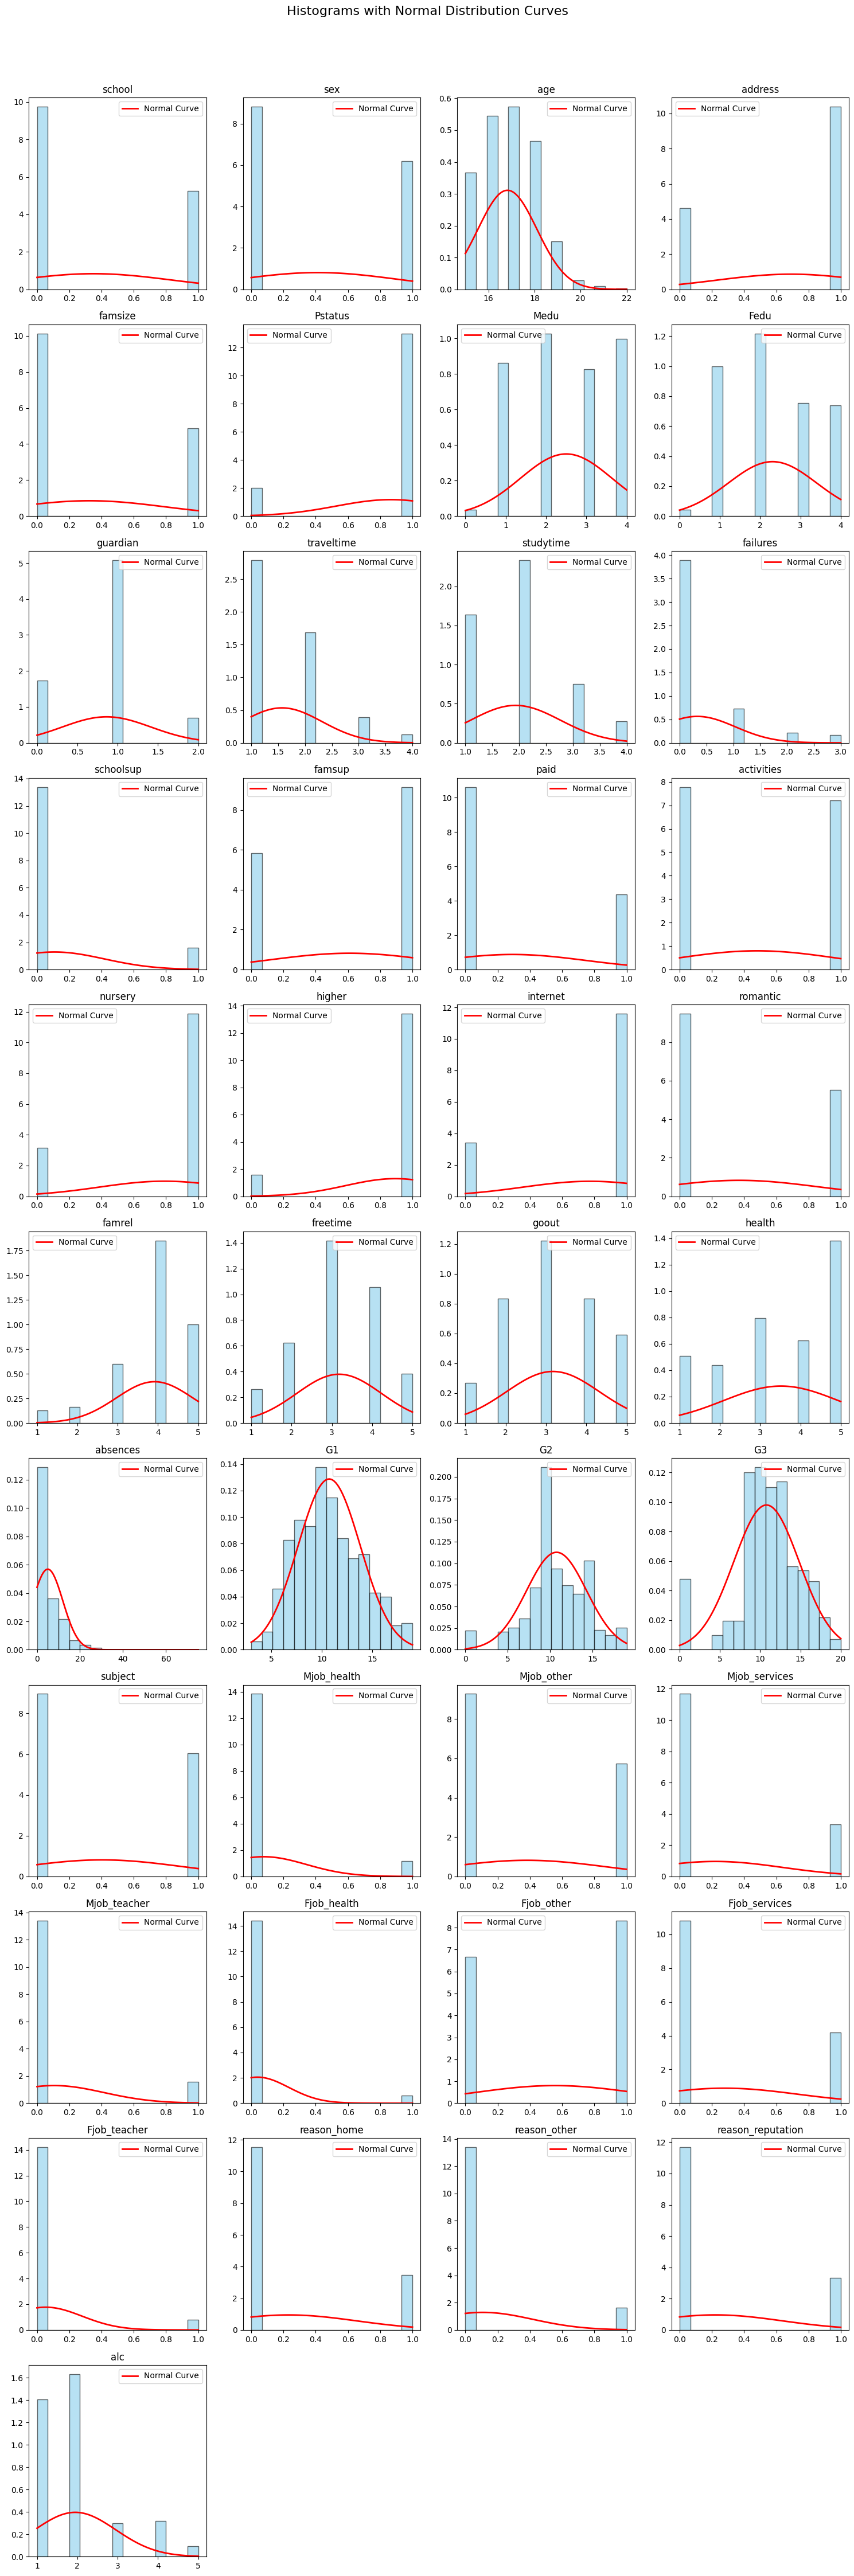

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

n_features = len(df_student.columns)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, column in enumerate(df_student.columns):
    data = df_student[column]
    axes[i].hist(data, bins=15, color='skyblue', edgecolor='black', density=True, alpha=0.6)
    
    mean, std = np.mean(data), np.std(data)
    
    x = np.linspace(data.min(), data.max(), 100)
    y = norm.pdf(x, mean, std)
    
    axes[i].plot(x, y, color='red', linewidth=2, label='Normal Curve')
    axes[i].set_title(column)
    axes[i].legend()

for j in range(len(df_student.columns), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Histograms with Normal Distribution Curves', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

We can assess the distribution of each dataset feature by performing a skewness test, which evaluates the asymmetry of the data. A skewness value of 0 signifies a perfectly symmetrical distribution. Positive skewness indicates a right-skewed distribution, while negative skewness suggests a left-skewed distribution.

In [16]:
from scipy.stats import skew
import pandas as pd

pd.set_option('display.max_rows', None)

numeric_columns = df_student.select_dtypes(include=['int64', 'float64']).columns

skewness_results = {column: skew(df_student[column]) for column in numeric_columns}

skewness_df = pd.DataFrame(list(skewness_results.items()), columns=['Feature', 'Skewness'])

print(skewness_df)

pd.reset_option('display.max_rows')

              Feature  Skewness
0              school  0.625591
1                 sex  0.354546
2                 age  0.417901
3             address -0.830145
4             famsize  0.749052
5             Pstatus -2.151752
6                Medu -0.032421
7                Fedu  0.212820
8            guardian -0.055980
9          traveltime  1.254160
10          studytime  0.699714
11           failures  2.352275
12          schoolsup  2.531509
13             famsup -0.451543
14               paid  0.914890
15         activities  0.075094
16            nursery -1.432822
17             higher -2.559176
18           internet -1.305113
19           romantic  0.544398
20             famrel -1.095575
21           freetime -0.197965
22              goout -0.003541
23             health -0.471450
24           absences  3.823399
25                 G1  0.322198
26                 G2 -0.378030
27                 G3 -0.768634
28            subject  0.395784
29        Mjob_health  3.182074
30      

Upon analyzing the histograms and skewness results, the distribution of features in the dataset demonstrates a tendency toward right-skewed distributions, characterized by longer right tails. This is supported by positive skewness values for features such as `famsize`, `traveltime`, `studytime`, `failures`, `schoolsup`, `alc`, `absences`, `paid`, `Mjob_health`, `Mjob_services`, `reason_home`, `reason_other`, and `Fjob_teacher`.

Conversely, some features exhibit left-skewed distributions, with longer left tails. These include `address`, `Pstatus`, `nursery`, `higher`, `internet`, `famrel`, and `health`. Features with skewness values close to zero, such as `sex`, `age`, `Medu`, `Fedu`, `guardian`, `activities`, `goout`, `G1`, and `G2`, suggest relatively symmetrical distributions.

### Box Plot for Outlier Detection for Numeric Features

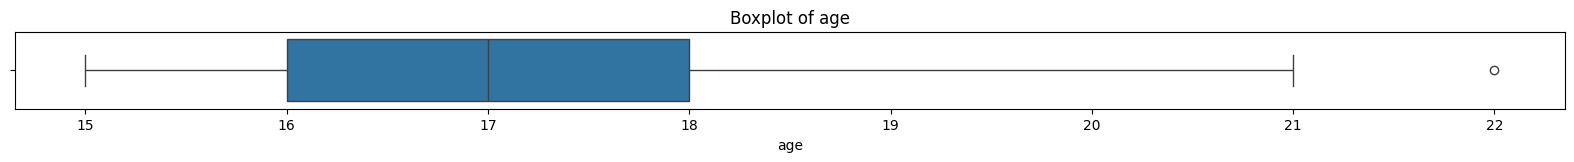

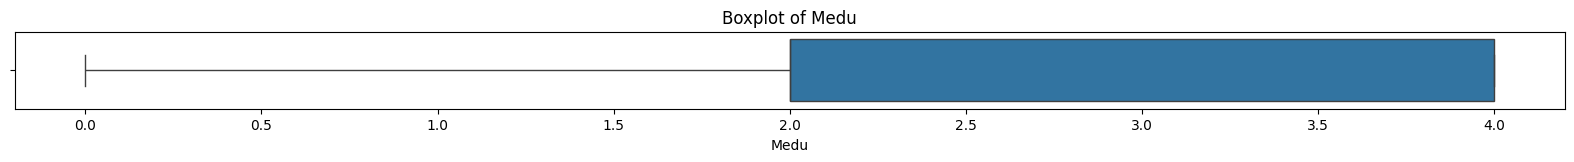

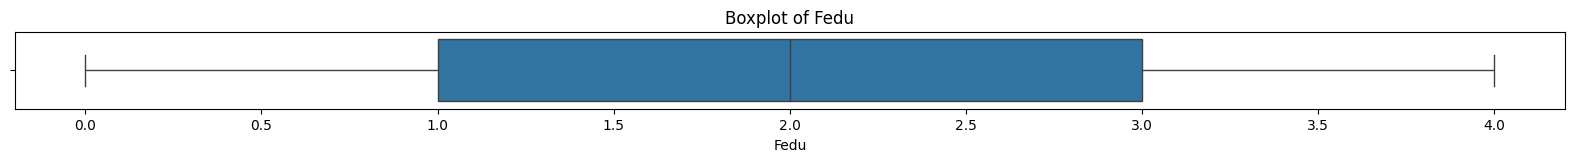

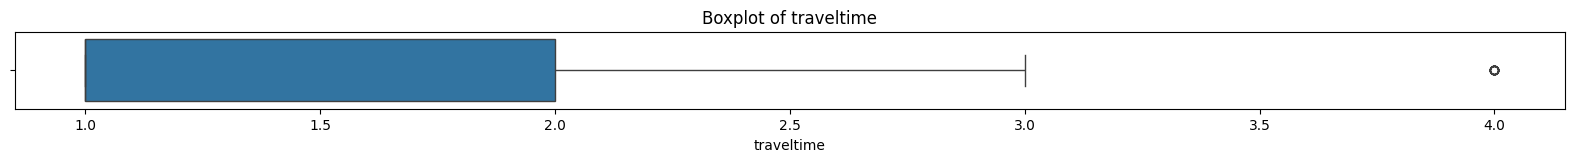

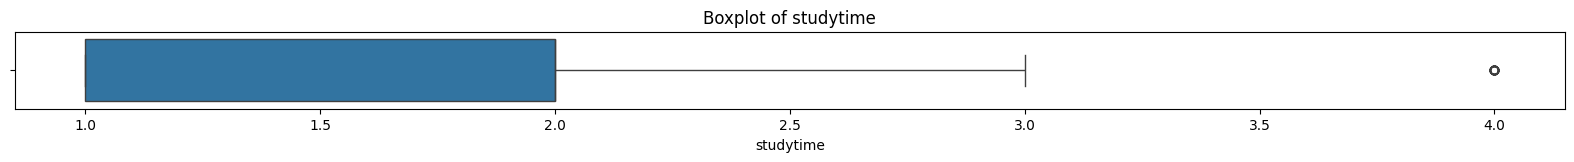

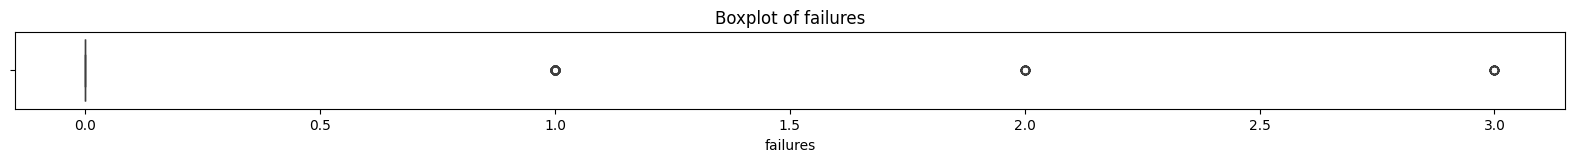

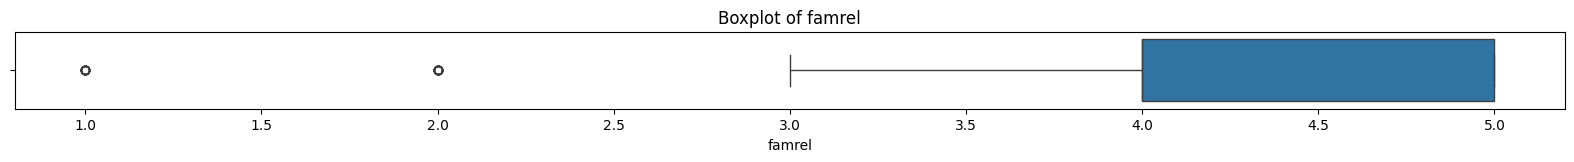

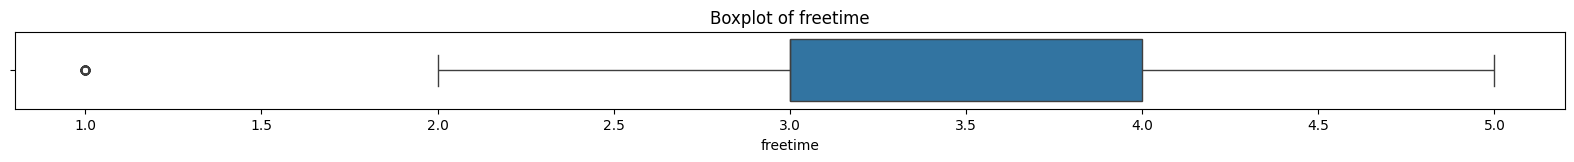

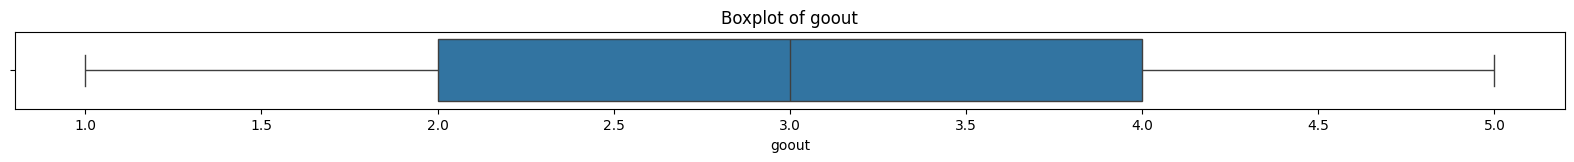

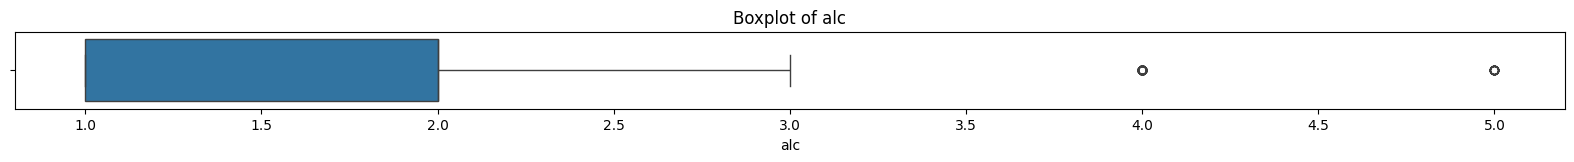

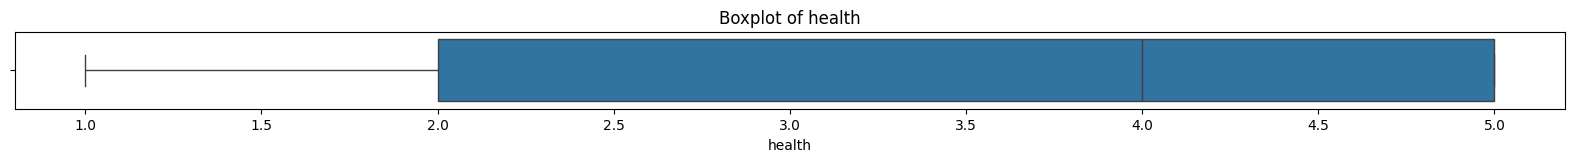

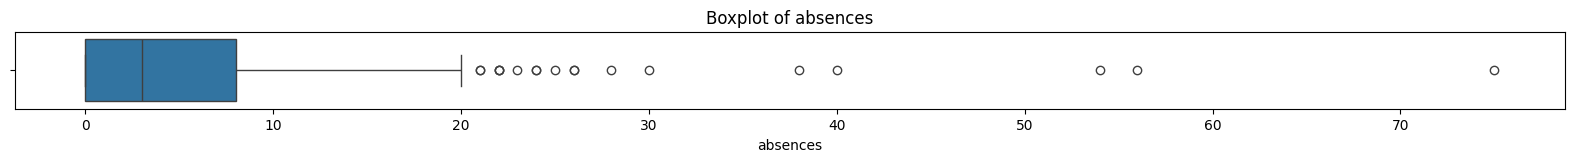

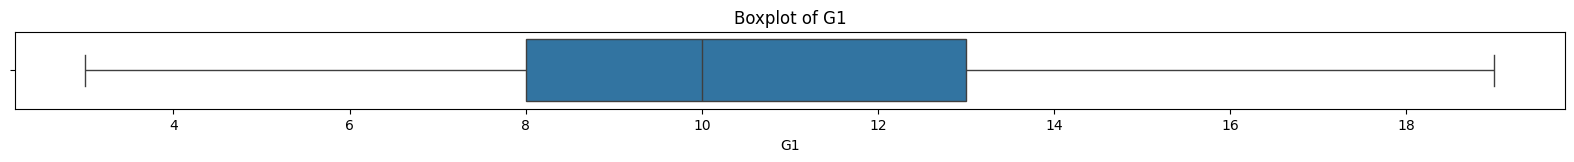

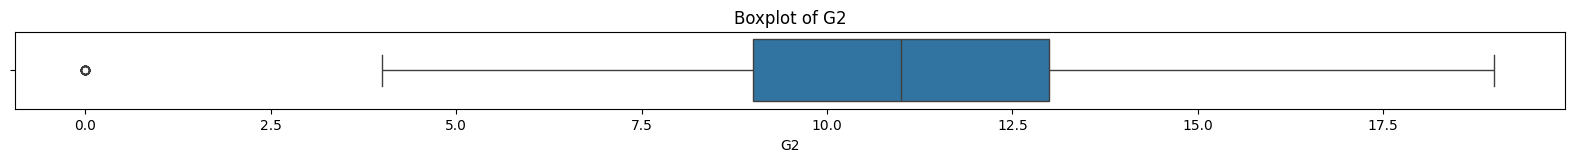

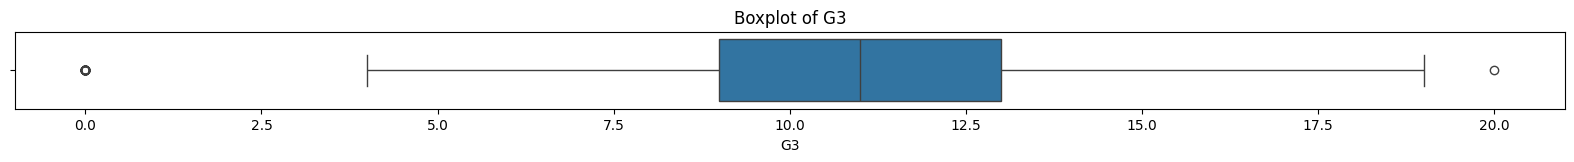

In [17]:
numeric_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
                    'famrel', 'freetime', 'goout', 'alc', 'health', 'absences', 
                    'G1', 'G2', 'G3']

for feature in numeric_features:
    plt.figure(figsize=(20, 1))
    sns.boxplot(x=df_student[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

By identifying potential outliers, we can ensure that extreme values don't skew the results and improve the robustness of our model. This helps us understand the spread and central tendency of the data, guiding decisions on whether outliers need to be handled or if any features require transformation for better model performance.

### Correlation Analysis for Numeric Features

In this project, we use correlation analysis to examine the relationships between numeric features and identify any strong associations among them. So by calculating and showing the correlation matrix through a heatmap, we can assess how each feature correlates with others, providing insights into potential dependencies between variables. Understanding these relationships is essential for feature selection, as highly correlated features may need to be dropped or combined to avoid redundancy and improve the performance of our model.

In [18]:
numeric_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                    'famrel', 'freetime', 'goout', 'alc', 'health', 'absences', 'G1', 'G2']

numeric_df = df_student[numeric_features].copy()

corr_matrix = numeric_df.corr()
print(corr_matrix)

                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.115743 -0.120977    0.007997   0.004441  0.296321   
Medu       -0.115743  1.000000  0.624183   -0.236237   0.102239 -0.164609   
Fedu       -0.120977  0.624183  1.000000   -0.190078   0.040185 -0.169679   
traveltime  0.007997 -0.236237 -0.190078    1.000000  -0.058990  0.068882   
studytime   0.004441  0.102239  0.040185   -0.058990   1.000000 -0.125660   
failures    0.296321 -0.164609 -0.169679    0.068882  -0.125660  1.000000   
famrel     -0.013133  0.005450  0.021285    0.000464   0.013550 -0.073113   
freetime    0.007489 -0.016001  0.008403   -0.003233  -0.075427  0.090668   
goout       0.102818  0.034358  0.061039    0.053524  -0.101479  0.048008   
alc         0.116954 -0.028328  0.004152    0.068003  -0.221969  0.102002   
health     -0.019944 -0.014816  0.034434   -0.030531  -0.054676  0.048239   
absences    0.173308  0.099065  0.076117   -0.042327  -0.037301  0.087850   

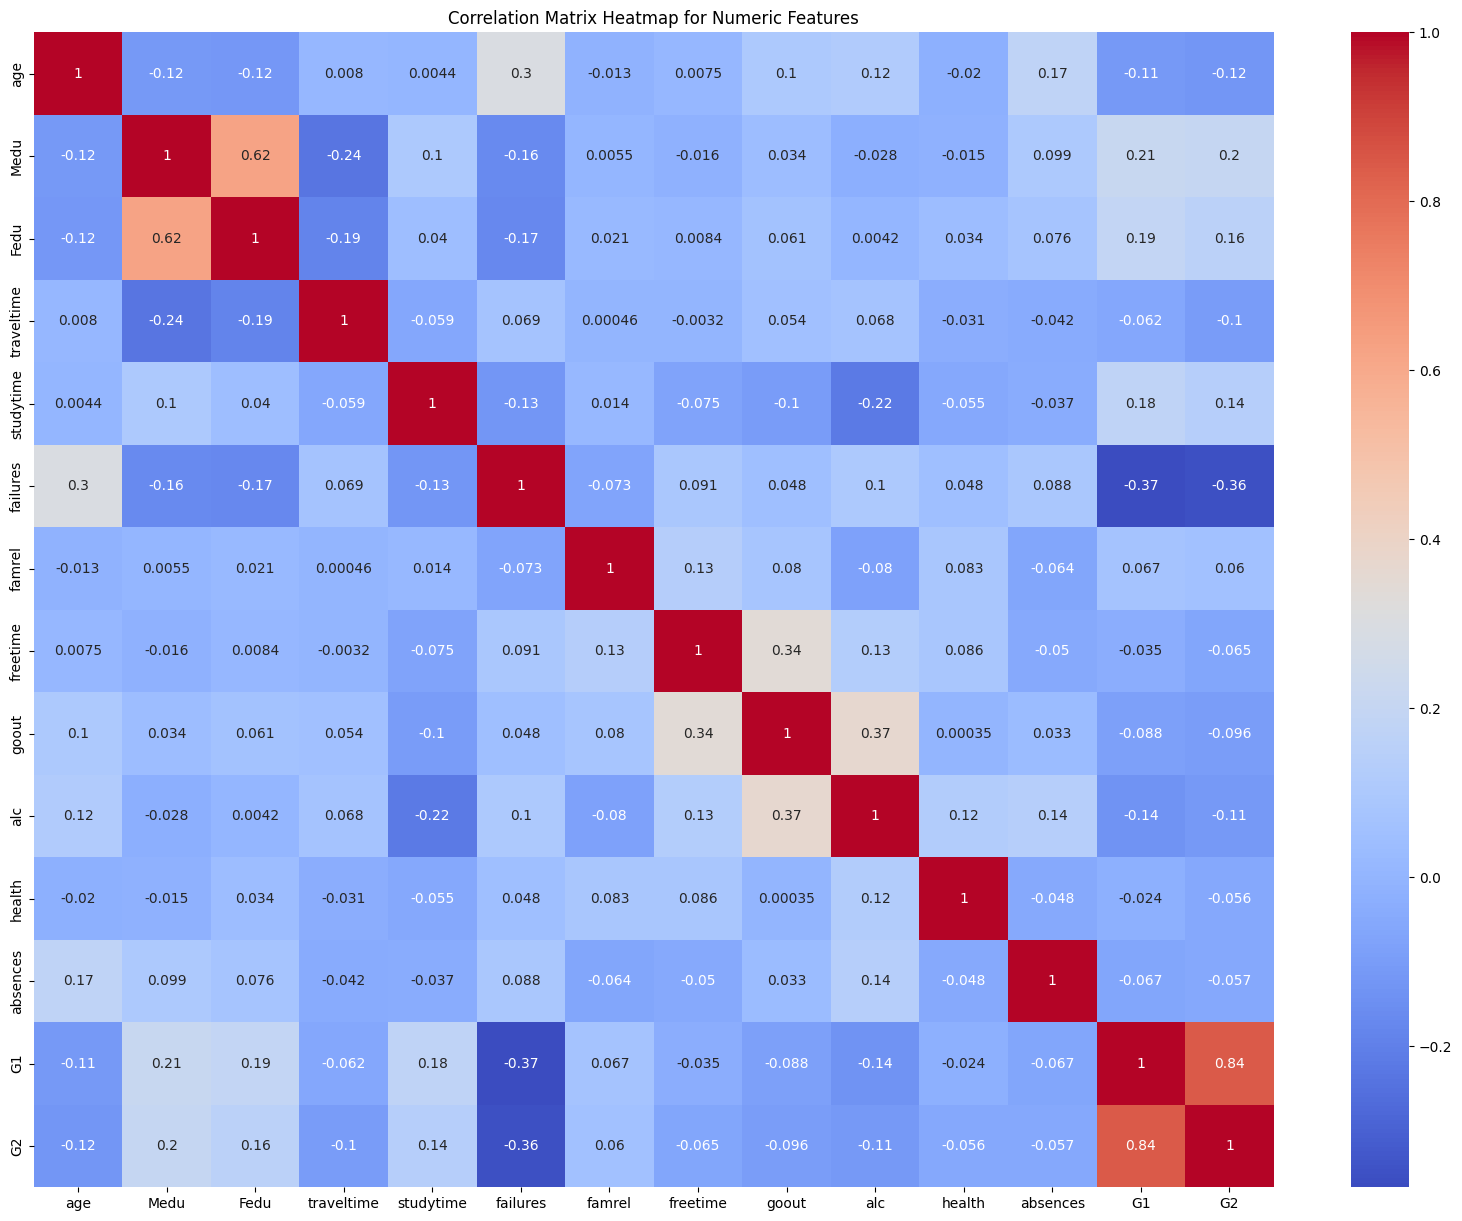

    Feature 1 Feature 2  Correlation
181        G1        G2     0.844777
194        G2        G1     0.844777


In [19]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, cbar=True)
plt.title("Correlation Matrix Heatmap for Numeric Features")
plt.show()

# correlation > 0.8
significant_correlations = corr_matrix.unstack().reset_index()
significant_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']

significant_correlations = significant_correlations[
    (abs(significant_correlations['Correlation']) > 0.8) & (significant_correlations['Feature 1'] != significant_correlations['Feature 2'])
]

significant_correlations_sorted = significant_correlations.sort_values(by='Correlation', ascending=False)

print(significant_correlations_sorted)

For another metric, we can have a numerical list to show the correlation values of `G3` with other features

In [20]:
g3_corr = numeric_df.copy()
g3_corr['G3'] = df_student['G3']

g3_corr_result = g3_corr.corr()['G3']
print(g3_corr_result)

age          -0.116902
Medu          0.179252
Fedu          0.135628
traveltime   -0.068253
studytime     0.102336
failures     -0.360218
famrel        0.071941
freetime     -0.066130
goout        -0.078325
alc          -0.099946
health       -0.046317
absences     -0.021822
G1            0.795185
G2            0.915417
G3            1.000000
Name: G3, dtype: float64


From both representations, there are constantly two features with high correlation values and have a great connection to `G3`, both `G1` and `G2`.

In [21]:
significant_correlations_sorted['Pair'] = significant_correlations_sorted.apply(
    lambda row: tuple(sorted([row['Feature 1'], row['Feature 2']])), axis=1
)

unique_pairs = significant_correlations_sorted.drop_duplicates(subset='Pair').drop(columns=['Pair'])

display(unique_pairs)

,Feature 1,Feature 2,Correlation
181,G1,G2,0.844777


So to reduce redundancy in our dataset by identifying and removing highly correlated features, we focus on feature pairs that have a strong correlation that may introduce multicollinearity, which can negatively affect the model's performance. 

In most cases, features that are beyond the threshold are dropped to reduce multicollinearity, but in this case, there are only two features that pass the threshold, and they both have high correlations to one another. Knowing this, dropping even one the features would remove the other's high correlation value from the correlation matrix. So after careful consideration, we decided to keep the feature with a closer connection to `G3`, ensuring that the model remains sensitive to the target variable while also reducing multicollinearity.

In [22]:
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.8

# Identify features to drop, keeping the one with the highest correlation to the target
features_to_drop = set()
for column in upper_triangle.columns:
    high_corr_features = upper_triangle.index[upper_triangle[column] > threshold].tolist()
    features_to_drop.update(high_corr_features)

features_to_drop = features_to_drop - {'G3'}

numeric_df_dropped = numeric_df.drop(columns=features_to_drop)
df_student = df_student.drop(columns=features_to_drop)

corr_matrix_dropped = numeric_df_dropped.corr()

print("Dropped Features:", features_to_drop)

Dropped Features: {'G1'}


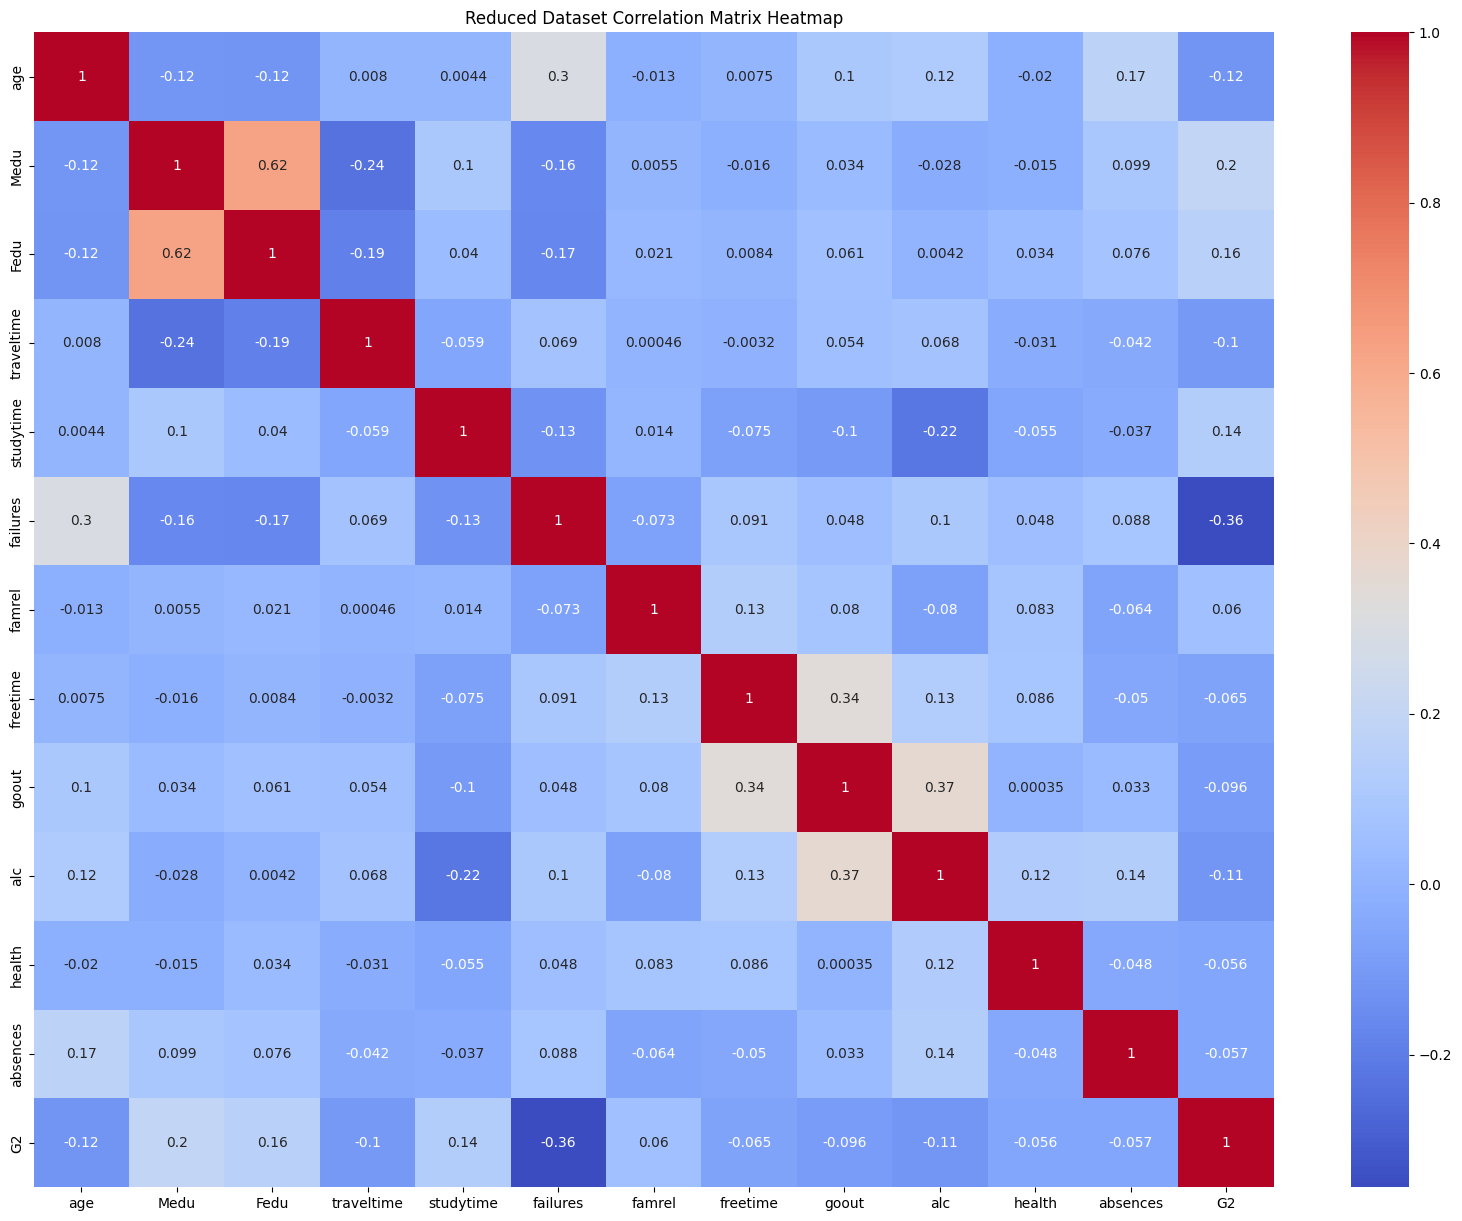

In [23]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix_dropped, cmap='coolwarm', annot=True, cbar=True)
plt.title("Reduced Dataset Correlation Matrix Heatmap")
plt.show()

significant_correlations_dropped = corr_matrix_dropped.unstack().reset_index()
significant_correlations_dropped.columns = ['Feature 1', 'Feature 2', 'Correlation']
significant_correlations_dropped = significant_correlations_dropped[
    (abs(significant_correlations_dropped['Correlation']) > 0.8) & 
    (significant_correlations_dropped['Feature 1'] != significant_correlations_dropped['Feature 2'])
]

significant_correlations_sorted_dropped = significant_correlations_dropped.sort_values(by='Correlation', ascending=False)

### Feature Selection Findings

Based on the correlation values with the target variable (`G3`) presented earlier, it appears that `G2` shows a relatively strong positive correlation with `G3`, even more than `G1`. Therefore, for model training, we will include `G2` as part of our feature set, and `G1` gets dropped for passing the threshold.

## 6. Model Training

### Linear Regression

### Decision Trees

### Random Forest

## 7. Error Analysis

### Linear Regression

### Decision Trees

### Random Forest

## 8. Improving Model Performance

### Linear Regression

### Decision Trees

### Random Forest

## 9. Model Performance Summary

## 10. Insights and Conclusions

## 11. References